# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.shape

(108648, 11)

In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [6]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76053, 10), (32595, 10), (76053,), (32595,))

SeriousDlqin2yrs
0    101322
1      7326
Name: count, dtype: int64


<Axes: xlabel='SeriousDlqin2yrs'>

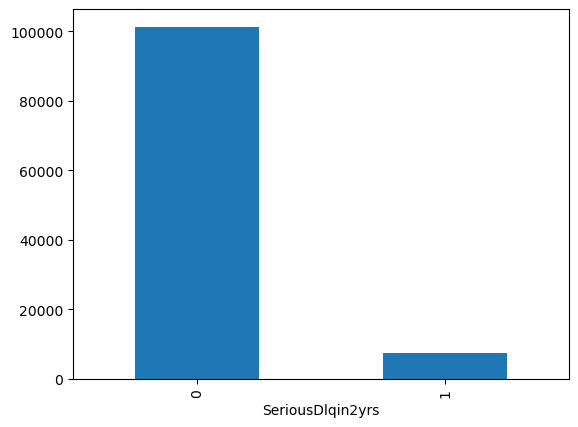

In [7]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
print(y.value_counts())

# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
y.value_counts().plot(kind='bar')

#### 2.数据预处理之离散化

In [8]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
# 查看年龄分布
X_train['age'].describe()

count    76053.000000
mean        51.343129
std         14.437048
min          0.000000
25%         41.000000
50%         51.000000
75%         62.000000
max        103.000000
Name: age, dtype: float64

In [9]:
# 发现竟然有0岁的，清除这些数据
y_train = y_train[(X_train['age'] > 0).values]
X_train = X_train[X_train['age'] > 0]
X_train['age'].describe()

count    76052.000000
mean        51.343804
std         14.435943
min         21.000000
25%         41.000000
50%         51.000000
75%         62.000000
max        103.000000
Name: age, dtype: float64

In [10]:
# 检查数据维度
print(X_train.shape)
print(y_train.shape)

(76052, 10)
(76052,)


In [11]:
pd.cut(X_train.age, bins=range(21, 106, 3), right=False)

64329     [27, 30)
70087     [81, 84)
77642     [72, 75)
6017      [54, 57)
106521    [81, 84)
            ...   
22092     [48, 51)
47726     [27, 30)
44326     [66, 69)
45320     [27, 30)
70966     [57, 60)
Name: age, Length: 76052, dtype: category
Categories (28, interval[int64, left]): [[21, 24) < [24, 27) < [27, 30) < [30, 33) ... [93, 96) < [96, 99) < [99, 102) < [102, 105)]

In [12]:
X_train['age_class'] = pd.cut(X_train.age, bins=range(21, 106, 3), right=False)
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_class
64329,0.116959,27.0,0.0,0.326024,3100.0,7.0,0.0,0.0,0.0,1.0,"[27, 30)"
70087,0.050666,83.0,0.0,0.177182,10000.0,9.0,0.0,1.0,0.0,0.0,"[81, 84)"
77642,0.038865,72.0,0.0,0.016600,5722.0,7.0,0.0,0.0,0.0,0.0,"[72, 75)"
6017,0.023513,56.0,0.0,0.266260,10500.0,8.0,0.0,2.0,0.0,3.0,"[54, 57)"
106521,0.039350,83.0,0.0,0.195179,1700.0,3.0,0.0,0.0,0.0,0.0,"[81, 84)"
...,...,...,...,...,...,...,...,...,...,...,...
22092,0.576336,48.0,1.0,0.303042,10750.0,17.0,0.0,1.0,0.0,3.0,"[48, 51)"
47726,1.000000,28.0,0.0,0.068123,2700.0,2.0,0.0,0.0,0.0,0.0,"[27, 30)"
44326,0.275989,67.0,0.0,0.267683,4000.0,4.0,0.0,1.0,0.0,0.0,"[66, 69)"
45320,0.979204,29.0,1.0,0.098725,4000.0,5.0,0.0,0.0,0.0,3.0,"[27, 30)"


In [13]:
X_test['age_class'] = pd.cut(X_test.age, bins=range(21, 106, 3), right=False)
X_test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_class
107294,0.128706,61.0,0.0,0.790269,4500.0,24.0,0.0,4.0,0.0,0.0,"[60, 63)"
39317,0.108896,77.0,0.0,0.159920,2000.0,12.0,0.0,0.0,0.0,0.0,"[75, 78)"
40606,0.153372,50.0,0.0,0.375656,4000.0,9.0,0.0,1.0,0.0,0.0,"[48, 51)"
68931,0.067802,58.0,0.0,0.297658,16696.0,13.0,0.0,1.0,0.0,1.0,"[57, 60)"
20745,0.399198,57.0,0.0,0.223816,17500.0,16.0,0.0,2.0,0.0,0.0,"[57, 60)"
...,...,...,...,...,...,...,...,...,...,...,...
65166,0.112090,62.0,0.0,0.124898,6100.0,6.0,0.0,1.0,0.0,0.0,"[60, 63)"
109192,0.360511,57.0,0.0,0.559328,5949.0,11.0,0.0,1.0,0.0,0.0,"[57, 60)"
85812,0.274942,56.0,0.0,0.356038,5108.0,16.0,0.0,1.0,0.0,0.0,"[54, 57)"
50213,0.174594,39.0,0.0,0.270698,8333.0,9.0,0.0,2.0,0.0,2.0,"[39, 42)"


#### 3.数据预处理之独热向量编码

In [14]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
X_train = pd.get_dummies(X_train, dtype='float')
X_train = X_train.drop('age', axis=1)
X_train

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_class_[21, 24)","age_class_[24, 27)","age_class_[27, 30)","age_class_[30, 33)","age_class_[33, 36)","age_class_[36, 39)","age_class_[39, 42)","age_class_[42, 45)","age_class_[45, 48)","age_class_[48, 51)","age_class_[51, 54)","age_class_[54, 57)","age_class_[57, 60)","age_class_[60, 63)","age_class_[63, 66)","age_class_[66, 69)","age_class_[69, 72)","age_class_[72, 75)","age_class_[75, 78)","age_class_[78, 81)","age_class_[81, 84)","age_class_[84, 87)","age_class_[87, 90)","age_class_[90, 93)","age_class_[93, 96)","age_class_[96, 99)","age_class_[99, 102)","age_class_[102, 105)"
64329,0.116959,0.0,0.326024,3100.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70087,0.050666,0.0,0.177182,10000.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77642,0.038865,0.0,0.016600,5722.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6017,0.023513,0.0,0.266260,10500.0,8.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106521,0.039350,0.0,0.195179,1700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22092,0.576336,1.0,0.303042,10750.0,17.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47726,1.000000,0.0,0.068123,2700.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44326,0.275989,0.0,0.267683,4000.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45320,0.979204,1.0,0.098725,4000.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X_test = pd.get_dummies(X_test, dtype='float')
X_test = X_test.drop('age', axis=1)
X_test

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_class_[21, 24)","age_class_[24, 27)","age_class_[27, 30)","age_class_[30, 33)","age_class_[33, 36)","age_class_[36, 39)","age_class_[39, 42)","age_class_[42, 45)","age_class_[45, 48)","age_class_[48, 51)","age_class_[51, 54)","age_class_[54, 57)","age_class_[57, 60)","age_class_[60, 63)","age_class_[63, 66)","age_class_[66, 69)","age_class_[69, 72)","age_class_[72, 75)","age_class_[75, 78)","age_class_[78, 81)","age_class_[81, 84)","age_class_[84, 87)","age_class_[87, 90)","age_class_[90, 93)","age_class_[93, 96)","age_class_[96, 99)","age_class_[99, 102)","age_class_[102, 105)"
107294,0.128706,0.0,0.790269,4500.0,24.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39317,0.108896,0.0,0.159920,2000.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40606,0.153372,0.0,0.375656,4000.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68931,0.067802,0.0,0.297658,16696.0,13.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20745,0.399198,0.0,0.223816,17500.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65166,0.112090,0.0,0.124898,6100.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109192,0.360511,0.0,0.559328,5949.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85812,0.274942,0.0,0.356038,5108.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50213,0.174594,0.0,0.270698,8333.0,9.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 4.数据预处理之幅度缩放

In [16]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
import numpy as np

sc = StandardScaler()
sc.fit(X_train)
sc.fit(X_test)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
X_train_std

array([[-0.02341639, -0.1087178 ,  0.08500643, ..., -0.00783345,
        -0.005539  ,  0.        ],
       [-0.02371107, -0.1087178 , -0.5817387 , ..., -0.00783345,
        -0.005539  ,  0.        ],
       [-0.02376353, -0.1087178 , -1.30107844, ..., -0.00783345,
        -0.005539  ,  0.        ],
       ...,
       [-0.02270949, -0.1087178 , -0.17633474, ..., -0.00783345,
        -0.005539  ,  0.        ],
       [-0.01958362,  0.18475273, -0.93319155, ..., -0.00783345,
        -0.005539  ,  0.        ],
       [-0.02347851,  0.47822326, -0.51800322, ..., -0.00783345,
        -0.005539  ,  0.        ]])

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [18]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

In [19]:
coef = lr.coef_[0]

labels = X_train.columns[:]
indices = np.argsort(coef)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            labels[indices[f]], 
                            coef[indices[f]]))

 1) NumberOfTime30-59DaysPastDueNotWorse 1.629107
 2) NumberOfTimes90DaysLate        1.579294
 3) DebtRatio                      0.309633
 4) age_class_[27, 30)             0.125296
 5) NumberOfDependents             0.107042
 6) age_class_[30, 33)             0.103158
 7) age_class_[33, 36)             0.102571
 8) age_class_[24, 27)             0.096190
 9) age_class_[39, 42)             0.074842
10) age_class_[36, 39)             0.057040
11) age_class_[42, 45)             0.053830
12) age_class_[45, 48)             0.053372
13) age_class_[48, 51)             0.040974
14) age_class_[51, 54)             0.040587
15) age_class_[21, 24)             0.031500
16) age_class_[99, 102)            0.011360
17) age_class_[54, 57)             0.000477
18) age_class_[102, 105)           -0.002201
19) age_class_[87, 90)             -0.004014
20) RevolvingUtilizationOfUnsecuredLines -0.012006
21) age_class_[90, 93)             -0.018179
22) age_class_[57, 60)             -0.029211
23) age_class_[

#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [20]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
param_grid = {'C': [1, 10, 100, 500],
              'penalty': ['l1', 'l2']}
param_grid

{'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2']}

In [21]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid)
grid_search.fit(X_train_std, y_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2']})

In [22]:
# 输出最好的超参数
# 输出最好的模型
print(grid_search.best_params_)
print(grid_search.best_score_)

lr_best = grid_search.best_estimator_
lr_best

{'C': 10, 'penalty': 'l1'}
0.933111550168437


LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [23]:
#由于训练时间太长，导出以备用
import joblib

# joblib.dump(lr_best, 'lr_best.pkl')
# lr_best = joblib.load('lr_best.pkl')

['lr_best.pkl']

#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [27]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn import metrics

y_pred = lr_best.predict(X_test_std)
y_pred_prob = lr_best.predict_proba(X_test_std)[:,1]

print('准确率：', metrics.accuracy_score(y_test, y_pred))
print('召回率：', metrics.recall_score(y_test, y_pred))
print('auc：', metrics.roc_auc_score(y_test, y_pred_prob))
print('混淆矩阵：\n', metrics.confusion_matrix(y_test, y_pred))
print('f1值：', metrics.f1_score(y_test, y_pred))

准确率： 0.9338548857186685
召回率： 0.04099493321050207
auc： 0.698745856655386
混淆矩阵：
 [[30350    74]
 [ 2082    89]]
f1值： 0.07626392459297343


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [28]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
thresholds_df = pd.DataFrame(data=None, columns=['阈值', '混淆矩阵', '准确率', '召回率'])
for i in thresholds:
    y_pred_new = np.where(lr_best.predict_proba(X_test_std)[:,1] > i, 1, 0)
    thresholds_df.loc[len(thresholds_df.index)] = [i
                                                ,metrics.confusion_matrix(y_test, y_pred_new)
                                                ,metrics.accuracy_score(y_test, y_pred_new)
                                                ,metrics.recall_score(y_test, y_pred_new)]

thresholds_df

,阈值,混淆矩阵,准确率,召回率
0,0.1,"[[26800, 3624], [1251, 920]]",0.850437,0.423768
1,0.2,"[[29838, 586], [1776, 395]]",0.927535,0.181944
2,0.3,"[[30196, 228], [1946, 225]]",0.933303,0.103639
3,0.4,"[[30301, 123], [2033, 138]]",0.933855,0.063565
4,0.5,"[[30350, 74], [2082, 89]]",0.933855,0.040995
5,0.6,"[[30377, 47], [2113, 58]]",0.933732,0.026716
6,0.7,"[[30390, 34], [2132, 39]]",0.933548,0.017964
7,0.8,"[[30408, 16], [2150, 21]]",0.933548,0.009673
8,0.9,"[[30418, 6], [2168, 3]]",0.933303,0.001382


#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [29]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train_std, y_train)
importances = forest.feature_importances_

In [30]:
labels = X_train.columns[:]
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            labels[indices[f]], 
                            importances[indices[f]]))

 1) RevolvingUtilizationOfUnsecuredLines 0.185235
 2) DebtRatio                      0.167967
 3) MonthlyIncome                  0.163808
 4) NumberOfOpenCreditLinesAndLoans 0.097199
 5) NumberOfTimes90DaysLate        0.085754
 6) NumberOfTime30-59DaysPastDueNotWorse 0.059201
 7) NumberOfDependents             0.044955
 8) NumberOfTime60-89DaysPastDueNotWorse 0.044687
 9) NumberRealEstateLoansOrLines   0.033344
10) age_class_[48, 51)             0.009401
11) age_class_[45, 48)             0.008748
12) age_class_[42, 45)             0.008738
13) age_class_[39, 42)             0.008686
14) age_class_[51, 54)             0.008543
15) age_class_[36, 39)             0.008123
16) age_class_[54, 57)             0.007512
17) age_class_[30, 33)             0.007051
18) age_class_[33, 36)             0.006957
19) age_class_[57, 60)             0.006587
20) age_class_[60, 63)             0.006134
21) age_class_[27, 30)             0.005770
22) age_class_[63, 66)             0.004955
23) age_class

In [31]:
from sklearn.feature_selection import SelectFromModel

# 以阈值0.15选择特征
sfm = SelectFromModel(forest, threshold=0.15, prefit=True)
X_selected_train_std = sfm.transform(X_train_std)
X_selected_test_std = sfm.transform(X_test_std)

X_selected_train_std.shape, X_selected_test_std.shape

((76052, 3), (32595, 3))

In [32]:
# 拟合并评价模型
lr_selected = LogisticRegression(C=10, random_state=0, penalty='l1', solver='liblinear') 
lr_selected.fit(X_selected_train_std, y_train)

y_selected_pred = lr_selected.predict(X_selected_test_std)

print('准确率：', metrics.accuracy_score(y_test, y_selected_pred))
print('召回率：', metrics.recall_score(y_test, y_selected_pred))

准确率： 0.9333946924374904
召回率： 0.0


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [33]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_std, y_train)

RandomForestClassifier()

In [34]:
y_pred = forest.predict(X_test_std)

print('准确率：', metrics.accuracy_score(y_test, y_pred))
print('召回率：', metrics.recall_score(y_test, y_pred))

准确率： 0.9356036201871453
召回率： 0.1506218332565638


In [41]:
# 支持向量机
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_std, y_train)

SVC()

In [42]:
y_pred = svm.predict(X_test_std)

print('准确率：', metrics.accuracy_score(y_test, y_pred))
print('召回率：', metrics.recall_score(y_test, y_pred))

准确率： 0.9335787697499617
召回率： 0.010594196222938737


In [35]:
# K最近邻
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [36]:
y_pred = knn.predict(X_test_std)

print('准确率：', metrics.accuracy_score(y_test, y_pred))
print('召回率：', metrics.recall_score(y_test, y_pred))

准确率： 0.9325970240834484
召回率： 0.0783049286043298


In [37]:
# 以 knn 为例进行网格搜索调参
param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': [5, 10, 15, 25]}
param_grid

{'weights': ['uniform', 'distance'], 'n_neighbors': [5, 10, 15, 25]}

In [38]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn, param_grid)
grid_search.fit(X_train_std, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 25],
                         'weights': ['uniform', 'distance']})

In [39]:
print(grid_search.best_params_)
print(grid_search.best_score_)

knn_best = grid_search.best_estimator_
knn_best

{'n_neighbors': 15, 'weights': 'uniform'}
0.9328880208019292


KNeighborsClassifier(n_neighbors=15)

In [40]:
y_pred = knn_best.predict(X_test_std)

print('准确率：', metrics.accuracy_score(y_test, y_pred))
print('召回率：', metrics.recall_score(y_test, y_pred))

准确率： 0.9336094493020402
召回率： 0.029018885306310457
